In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

### LOAD DATASET

In [5]:
x_train=np.loadtxt("Image Classification CNN Keras Dataset/input.csv",delimiter=",")
y_train=np.loadtxt("Image Classification CNN Keras Dataset/labels.csv",delimiter=",")

x_test=np.loadtxt("Image Classification CNN Keras Dataset/input_test.csv",delimiter=",")
y_test=np.loadtxt("Image Classification CNN Keras Dataset/labels_test.csv",delimiter=",")

In [6]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (2000, 30000)
shape of y_train: (2000,)
shape of x_test: (400, 30000)
shape of y_test: (400,)


In [7]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [8]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (2000, 100, 100, 3)
shape of y_train: (2000, 1)
shape of x_test: (400, 100, 100, 3)
shape of y_test: (400, 1)


In [9]:
print(x_train[1:,])

[[[[131. 128. 135.]
   [160. 157. 164.]
   [198. 192. 204.]
   ...
   [250. 249. 247.]
   [255. 255. 253.]
   [250. 249. 245.]]

  [[140. 137. 144.]
   [127. 124. 131.]
   [120. 114. 124.]
   ...
   [251. 253. 252.]
   [254. 255. 253.]
   [254. 255. 251.]]

  [[204. 202. 207.]
   [187. 185. 190.]
   [147. 142. 148.]
   ...
   [249. 255. 255.]
   [238. 247. 242.]
   [232. 241. 236.]]

  ...

  [[174. 182. 195.]
   [172. 180. 193.]
   [178. 186. 197.]
   ...
   [ 87. 114.  97.]
   [ 75.  99.  83.]
   [ 80. 105.  86.]]

  [[166. 173. 189.]
   [164. 172. 185.]
   [172. 180. 193.]
   ...
   [ 78. 106.  84.]
   [ 72.  97.  76.]
   [ 77. 102.  81.]]

  [[173. 180. 196.]
   [172. 179. 195.]
   [174. 182. 195.]
   ...
   [ 63.  91.  69.]
   [ 62.  87.  65.]
   [ 71.  96.  74.]]]


 [[[ 80.  92.  88.]
   [ 83.  96.  89.]
   [ 76.  92.  82.]
   ...
   [ 14.  35.  20.]
   [ 14.  35.  20.]
   [ 20.  41.  26.]]

  [[ 78.  87.  84.]
   [ 90. 101.  95.]
   [ 79.  90.  82.]
   ...
   [ 37.  54.  38.]
 

In [10]:
x_train=x_train/255.0
x_test=x_test/255.0

In [11]:
# After Normalization
print(x_train[1:,])

[[[[0.51372549 0.50196078 0.52941176]
   [0.62745098 0.61568627 0.64313725]
   [0.77647059 0.75294118 0.8       ]
   ...
   [0.98039216 0.97647059 0.96862745]
   [1.         1.         0.99215686]
   [0.98039216 0.97647059 0.96078431]]

  [[0.54901961 0.5372549  0.56470588]
   [0.49803922 0.48627451 0.51372549]
   [0.47058824 0.44705882 0.48627451]
   ...
   [0.98431373 0.99215686 0.98823529]
   [0.99607843 1.         0.99215686]
   [0.99607843 1.         0.98431373]]

  [[0.8        0.79215686 0.81176471]
   [0.73333333 0.7254902  0.74509804]
   [0.57647059 0.55686275 0.58039216]
   ...
   [0.97647059 1.         1.        ]
   [0.93333333 0.96862745 0.94901961]
   [0.90980392 0.94509804 0.9254902 ]]

  ...

  [[0.68235294 0.71372549 0.76470588]
   [0.6745098  0.70588235 0.75686275]
   [0.69803922 0.72941176 0.77254902]
   ...
   [0.34117647 0.44705882 0.38039216]
   [0.29411765 0.38823529 0.3254902 ]
   [0.31372549 0.41176471 0.3372549 ]]

  [[0.65098039 0.67843137 0.74117647]
   [0.6

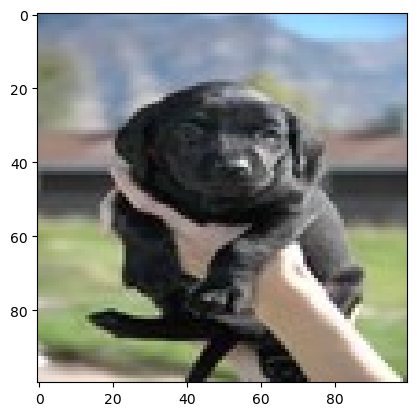

In [36]:
#print random test image
idx=random.randint(0,len(x_test))
plt.imshow(x_train[idx,:])
plt.show()

### MODEL

In [66]:
#Sequential is used in CNN implementation through Keras to build a linear stack of layers where each layer has exactly one input tensor and one output tensor.
model=Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation="relu"),
    Dense(1,activation="sigmoid")
    
])

In [68]:
#Another way of defining sequential
model=Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))



In [70]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [72]:
model.fit(x_train, y_train, epochs=15, batch_size=64)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.5175 - loss: 0.7565
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.6227 - loss: 0.6556
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7153 - loss: 0.5806
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7450 - loss: 0.5237
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.7721 - loss: 0.4945
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8320 - loss: 0.4107
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.8283 - loss: 0.3826
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8744 - loss: 0.3173
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.8899 - loss: 0.2710
Epoch 10/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9359 - loss: 0.1949
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9239 - loss: 0.1925
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy:

In [74]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7033 - loss: 0.9698


[1.036665439605713, 0.6899999976158142]

In [76]:
#The accuracy can be improved using larger dataset

## Making Predictions


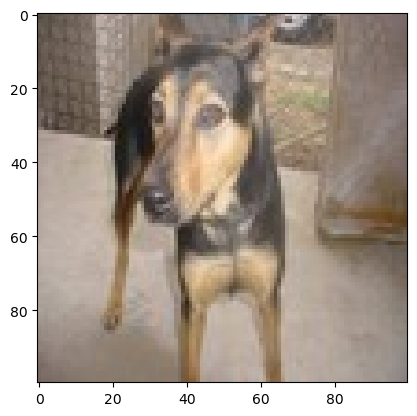

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Dog


In [146]:
idx2=random.randint(0,len(y_test))

plt.imshow(x_test[idx2,:])
plt.show()

y_pred=model.predict(x_test[idx2, :].reshape(1,100,100,3))
y_pred= y_pred>=0.5

if y_pred==0:
    print("Dog")
else:
    print("Cat")